In [1]:
import re
import pandas as pd
from indicnlp.tokenize import indic_tokenize
from indicnlp.normalize import indic_normalize
from indicnlp.transliterate import unicode_transliterate

In [14]:
data = pd.read_csv(r"C:\Users\raajj\Downloads\dataset.csv")
print(data.head())
print(data.tail())

   news_id                  news_date news_category  \
0      201  2010-03-25T01:55:00+05:30       தமிழகம்   
1      202  2010-03-25T01:55:00+05:30       தமிழகம்   
2      203  2010-03-25T01:56:00+05:30       தமிழகம்   
3      204  2010-03-25T01:56:00+05:30       தமிழகம்   
4      207  2010-03-25T02:00:00+05:30       இந்தியா   

                                          news_title  \
0  மின் தடையை கண்டித்து கிராம மக்கள் மறியல் : போல...   
1       விஷத்தன்மையுடன் கோதுமை இறக்குமதி; மூவர் கைது   
2        சாருலதாவுடன் தொடர்பு உதவி கமிஷனர் சஸ்பெண்ட்   
3         பழைய தலைமை செயலக ராணுவ குடோனில் தீ விபத்து   
4  11 பேரை பலி வாங்கிய பஸ் ஆற்றில் பாய்ந்தது எப்படி?   

                                        news_article  
0  புதுக்கோட்டை : மின்தடையை கண்டித்து மறியல் போரா...  
1  சென்னை : ஆஸ்திரேலியாவிலிருந்து விஷத் தன்மையுடன...  
2  சென்னை : போலி ஐ.பி.எஸ்., பெண் அதிகாரி சாருலதாவ...  
3  சென்னை : பழைய தலைமைச் செயலகத்தில் உள்ள ராணுவ க...  
4  கோட்டயம் : கேரள மாநிலம், சேர்த்தலா பகுதியில் இ...  
  

In [12]:
# Define the clean_text function
def clean_text(text):
    if pd.isna(text):
        return text
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^அ-ஔக-ஹௐ௑௒௓௔௕௖ௗ௘௙௚௛௜௝௞௟௠௡௢௣௤௥௦௧௨௩௪௫௬௭௮௯௰௱௲௳௴௵௶௷௸௹௺௻௼௽௾௿]+', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the clean_text function to the dataset
data['news_title'] = data['news_title'].apply(clean_text)
data['news_article'] = data['news_article'].apply(clean_text)

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df['news_article'] = df['news_article'].fillna('')

# Display first few rows of the dataset
print(df.head())

# Feature (news_article) and Target (news_category)
X = df['news_article']  # The text data
y = df['news_category']  # The categories to predict

# Convert text data into numerical using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Tamil stop words can be used
X_tfidf = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the model (Naive Bayes classifier)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_test, y_pred))

   news_id                  news_date news_category  \
0      201  2010-03-25T01:55:00+05:30       தமிழகம்   
1      202  2010-03-25T01:55:00+05:30       தமிழகம்   
2      203  2010-03-25T01:56:00+05:30       தமிழகம்   
3      204  2010-03-25T01:56:00+05:30       தமிழகம்   
4      207  2010-03-25T02:00:00+05:30       இந்தியா   

                                          news_title  \
0  மின் தடையை கண்டித்து கிராம மக்கள் மறியல் : போல...   
1       விஷத்தன்மையுடன் கோதுமை இறக்குமதி; மூவர் கைது   
2        சாருலதாவுடன் தொடர்பு உதவி கமிஷனர் சஸ்பெண்ட்   
3         பழைய தலைமை செயலக ராணுவ குடோனில் தீ விபத்து   
4  11 பேரை பலி வாங்கிய பஸ் ஆற்றில் பாய்ந்தது எப்படி?   

                                        news_article  
0  புதுக்கோட்டை : மின்தடையை கண்டித்து மறியல் போரா...  
1  சென்னை : ஆஸ்திரேலியாவிலிருந்து விஷத் தன்மையுடன...  
2  சென்னை : போலி ஐ.பி.எஸ்., பெண் அதிகாரி சாருலதாவ...  
3  சென்னை : பழைய தலைமைச் செயலகத்தில் உள்ள ராணுவ க...  
4  கோட்டயம் : கேரள மாநிலம், சேர்த்தலா பகுதியில் இ...  
Ac

In [38]:
from sklearn.linear_model import LogisticRegression
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

# Save the trained model and the vectorizer for future use
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and Vectorizer saved successfully!")

Model Accuracy: 90.26%
              precision    recall  f1-score   support

     General       0.58      0.39      0.46      8047
     இந்தியா       0.74      0.51      0.60     48687
     தமிழகம்       0.92      0.97      0.95    325360

    accuracy                           0.90    382094
   macro avg       0.75      0.62      0.67    382094
weighted avg       0.89      0.90      0.89    382094

Model and Vectorizer saved successfully!


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2984 (\N{TAMIL LETTER NA}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 3007 (\N{TAMIL VOWEL SIGN I}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:

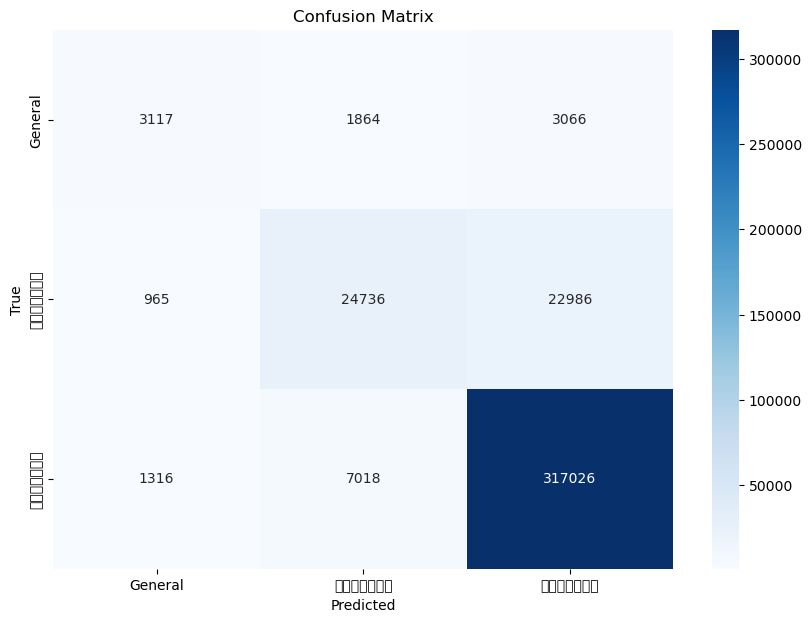

C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2984 (\N{TAMIL LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  

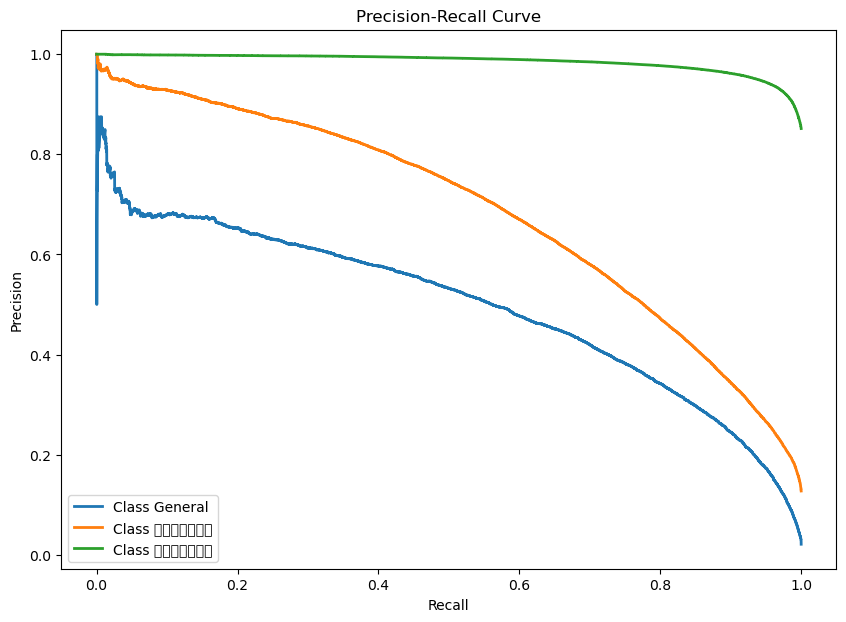

C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2951 (\N{TAMIL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Tamil natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2984 (\N{TAMIL LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3021 (\N{TAMIL SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2980 (\N{TAMIL LETTER TA}) missing from current font.
  

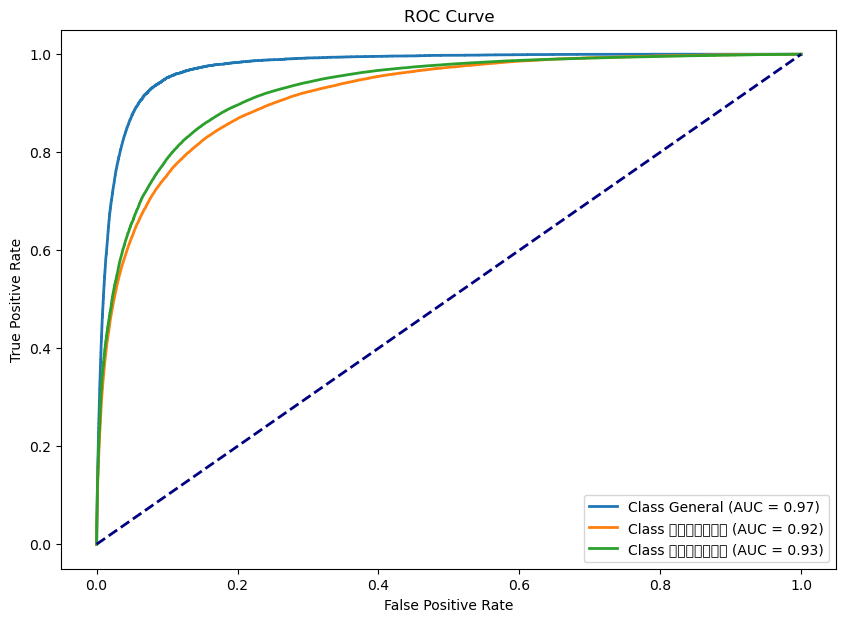

C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2975 (\N{TAMIL LETTER TTA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2970 (\N{TAMIL LETTER CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2986 (\N{TAMIL LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2997 (\N{TAMIL LETTER VA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\raajj\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2979 (\N{TAMIL LETTER NNA}) missing from current f

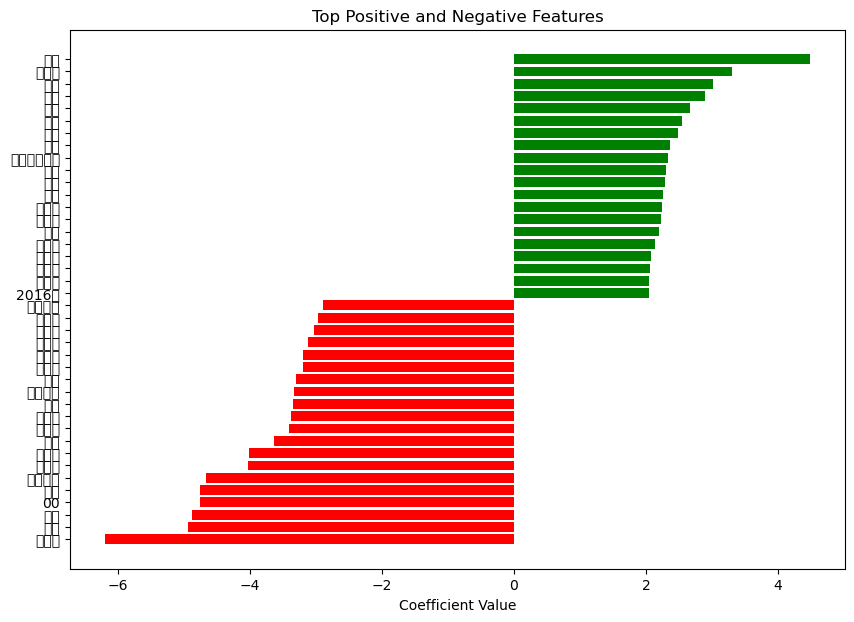

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the training labels (y)
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now fit the model with encoded labels
model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

### 1. Confusion Matrix ###
def plot_confusion_matrix(y_test_encoded, y_pred):
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(y_test_encoded, y_pred)

### 2. Precision-Recall Curve ###
def plot_precision_recall_curve(y_test_encoded, y_pred_proba, classes):
    plt.figure(figsize=(10, 7))
    for i in range(len(classes)):
        precision, recall, _ = precision_recall_curve(y_test_encoded == i, y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {classes[i]}')
    
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()

plot_precision_recall_curve(y_test_encoded, y_pred_proba, label_encoder.classes_)

### 3. ROC Curve ###
def plot_roc_curve(y_test_encoded, y_pred_proba, classes):
    plt.figure(figsize=(10, 7))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test_encoded == i, y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

plot_roc_curve(y_test_encoded, y_pred_proba, label_encoder.classes_)

### 4. Feature Importance ###
def plot_feature_importance(vectorizer, model, top_n=20):
    # Get feature names and coefficients from the logistic regression model
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_[0]

    # Sort the coefficients by absolute value
    top_positive_coefficients = np.argsort(coefficients)[-top_n:]
    top_negative_coefficients = np.argsort(coefficients)[:top_n]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

    # Create a bar plot of the top coefficients
    plt.figure(figsize=(10, 7))
    colors = ['red' if c < 0 else 'green' for c in coefficients[top_coefficients]]
    plt.barh(np.array(feature_names)[top_coefficients], coefficients[top_coefficients], color=colors)
    plt.title('Top Positive and Negative Features')
    plt.xlabel('Coefficient Value')
    plt.show()

plot_feature_importance(vectorizer, model)
